# Dog breeds classification project
## Author: Marusic Diana

In [176]:
import numpy as np
from io import StringIO   # StringIO behaves like a file object
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [177]:
# check python version
# import sys
# sys.version

Define and initialize some constants

In [178]:
######################################
###  CONSTANTS 
######################################
FILE_NAME = "Marusic_I_Diana_train.csv"
ALL_FEATURES = ["Breed Name","Weight(g)","Height(cm)","Longevity(yrs)",
    "Energy level", "Attention Needs", "Coat Lenght", "Sex",
    "Owner Name"]

COLUMN_NAMES = ["Breed Name","Weight(g)","Height(cm)","Longevity(yrs)",
    "Energy level", "Attention Needs", "Coat Lenght", "Sex",
    "Owner Name"]

SELECTED_FEATURES_BREED = ["Weight(g)","Height(cm)", "Energy level", "Attention Needs", "Coat Lenght", "Sex"];


breed_tags = {}
breeds = []


## Read data

In [179]:
data = pd.read_csv(FILE_NAME)
print(data)

print(data.describe())

         Breed Name   Weight(g)  Height(cm)  Longevity(yrs) Energy level  \
0    Bearded Collie  22280.5964     54.3216         13.1931         high   
1        Great Dane  51407.2976     76.6582          6.3828         high   
2    Bearded Collie  22122.0794     51.1220         12.0584          med   
3         Daschhund   6234.2029     21.4468         13.2225         high   
4    Bearded Collie  18103.0403     54.3006         12.6288         high   
5         Daschhund  10843.0668     21.1785         13.2595          med   
6        Great Dane  49810.6146         NaN          6.3221          med   
7         Daschhund  10333.2284     19.9325         12.6203         high   
8    Bearded Collie  26618.0765     54.2249         12.4848         high   
9        Great Dane  53354.6487     82.7296          6.7679         high   
10       Great Dane  50098.9062     79.9508          6.7008          low   
11        Dalmatian  20409.6415     48.0000         12.3616         high   
12       Gre

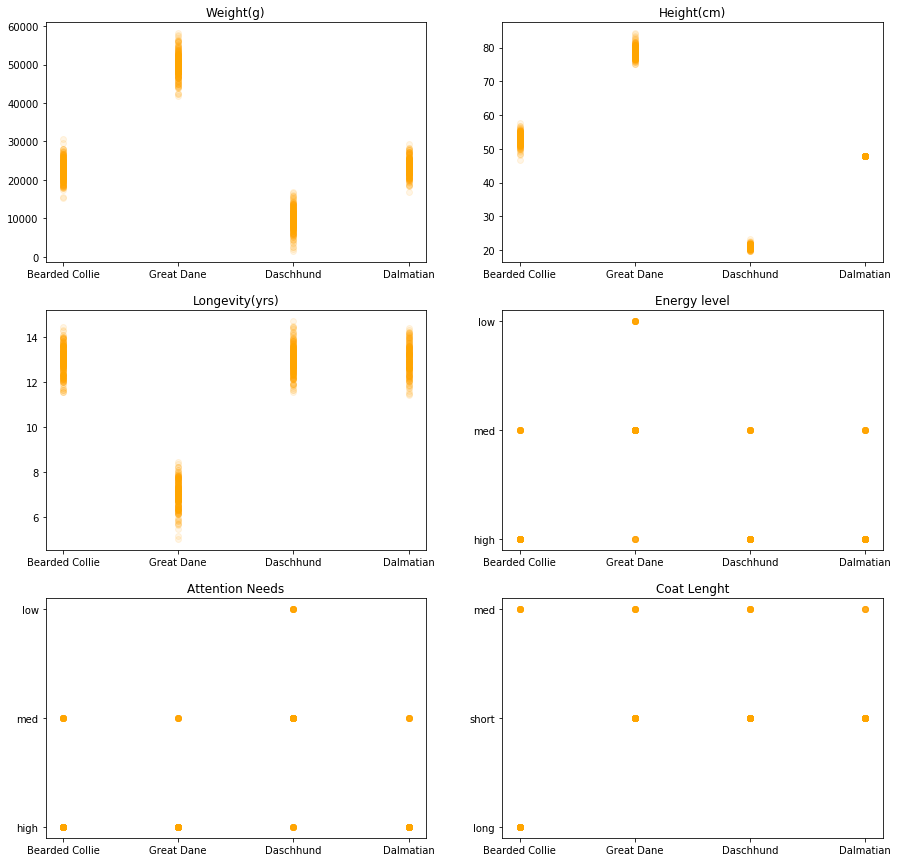

In [180]:


columns = ["Breed Name","Weight(g)","Height(cm)","Longevity(yrs)",
    "Energy level", "Attention Needs", "Coat Lenght", "Sex",
    "Owner Name"]

fig = plt.figure(figsize=(15, 15))
((p1,p2), (p3,p4), (p5,p6)) = fig.subplots(3,2)

# Save breed_names in a variable
breed_names = data.iloc[:, 0]


for i in range(1, 7):
        locals()['p'+str(i)].scatter(breed_names,data.iloc[:,i],alpha = 0.1, color="orange")
        locals()['p'+str(i)].set_title(data.columns[i])

## First task - classification (predict dog breeds)

Remove columns for unused features (Longevity and Owner name)

In [181]:
# print(data)
# data_some_cols = np.delete(dat,  2, 1)
# data = data.drop("Longevity(yrs)", axis=1)
data = data.drop("Owner Name", axis=1)
print(data)

         Breed Name   Weight(g)  Height(cm)  Longevity(yrs) Energy level  \
0    Bearded Collie  22280.5964     54.3216         13.1931         high   
1        Great Dane  51407.2976     76.6582          6.3828         high   
2    Bearded Collie  22122.0794     51.1220         12.0584          med   
3         Daschhund   6234.2029     21.4468         13.2225         high   
4    Bearded Collie  18103.0403     54.3006         12.6288         high   
5         Daschhund  10843.0668     21.1785         13.2595          med   
6        Great Dane  49810.6146         NaN          6.3221          med   
7         Daschhund  10333.2284     19.9325         12.6203         high   
8    Bearded Collie  26618.0765     54.2249         12.4848         high   
9        Great Dane  53354.6487     82.7296          6.7679         high   
10       Great Dane  50098.9062     79.9508          6.7008          low   
11        Dalmatian  20409.6415     48.0000         12.3616         high   
12       Gre

Update breed name and remove breed name column from data

### Transform non-numerical data to numerical

I use map functions for all values of type "low", "medium" and "heigh", because the order counts.
While for breed names, the order of numeric labels doesn't count, that's why I use scikit learn LabelEncoder.

In [182]:
data['Energy level'] = data['Energy level'].map( {'low':0, 'med':1, 'high':2})
data['Attention Needs'] = data['Attention Needs'].map( {'low':0, 'med':1, 'high':2})
data['Coat Lenght'] = data['Coat Lenght'].map( {'short':0, 'med':1, 'long':2})
data['Sex'] = data['Sex'].map( {'female':0, 'male':1})


# Update breed names


# data['Breed Name'] = data.iloc[:, 0]
print(data["Breed Name"])
le = preprocessing.LabelEncoder()
le.fit(data["Breed Name"])
print(le.classes_)
data["Breed Name"] = le.transform(data["Breed Name"]) 
print(data["Breed Name"])


print(data)

0      Bearded Collie
1          Great Dane
2      Bearded Collie
3           Daschhund
4      Bearded Collie
5           Daschhund
6          Great Dane
7           Daschhund
8      Bearded Collie
9          Great Dane
10         Great Dane
11          Dalmatian
12         Great Dane
13          Daschhund
14     Bearded Collie
15         Great Dane
16          Dalmatian
17          Daschhund
18          Dalmatian
19          Daschhund
20          Daschhund
21          Dalmatian
22     Bearded Collie
23          Dalmatian
24          Daschhund
25     Bearded Collie
26          Daschhund
27          Dalmatian
28          Daschhund
29         Great Dane
            ...      
970         Daschhund
971         Daschhund
972         Daschhund
973    Bearded Collie
974         Daschhund
975         Daschhund
976    Bearded Collie
977        Great Dane
978    Bearded Collie
979         Daschhund
980         Daschhund
981         Daschhund
982        Great Dane
983    Bearded Collie
984       

### Process rows containing NaN

In [183]:
def handleMissing(data):
    # Available strategies: mean, median, most_frequent, constant
#     imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#     imp.fit(data)  
    imp = SimpleImputer(strategy="most_frequent")
    result = imp.fit_transform(data)
    print(result)
    return result


In [184]:
print(data)

data = data.fillna(data.mean()['Height(cm)'])
# data = data.fillna(data.mean())

# data = handleMissing(data)
print(data)
# data = data.dropna()

     Breed Name   Weight(g)  Height(cm)  Longevity(yrs)  Energy level  \
0             0  22280.5964     54.3216         13.1931             2   
1             3  51407.2976     76.6582          6.3828             2   
2             0  22122.0794     51.1220         12.0584             1   
3             2   6234.2029     21.4468         13.2225             2   
4             0  18103.0403     54.3006         12.6288             2   
5             2  10843.0668     21.1785         13.2595             1   
6             3  49810.6146         NaN          6.3221             1   
7             2  10333.2284     19.9325         12.6203             2   
8             0  26618.0765     54.2249         12.4848             2   
9             3  53354.6487     82.7296          6.7679             2   
10            3  50098.9062     79.9508          6.7008             0   
11            1  20409.6415     48.0000         12.3616             2   
12            3  50870.7271         NaN          7.

## Plot data again to see differences

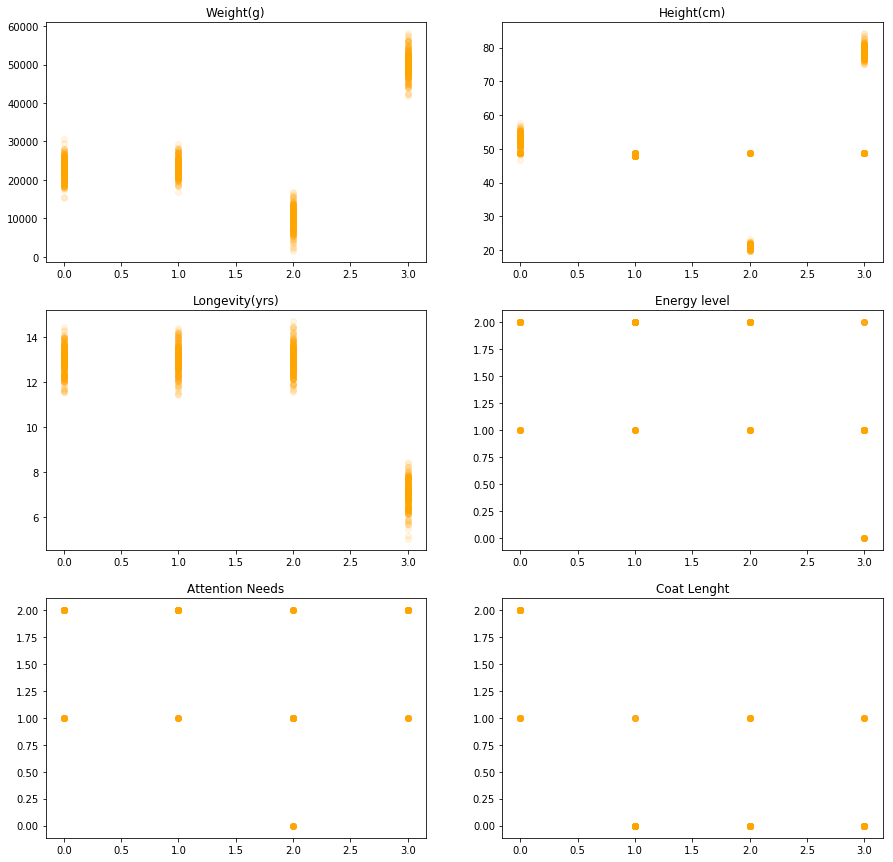

In [185]:


columns = ["Breed Name","Weight(g)","Height(cm)","Longevity(yrs)",
    "Energy level", "Attention Needs", "Coat Lenght", "Sex",
    "Owner Name"]

fig = plt.figure(figsize=(15, 15))
((p1,p2), (p3,p4), (p5,p6)) = fig.subplots(3,2)

# Save breed_names in a variable
breed_names = data.iloc[:, 0]


for i in range(1, 7):
        locals()['p'+str(i)].scatter(breed_names,data.iloc[:,i],alpha = 0.1, color="orange")
        locals()['p'+str(i)].set_title(data.columns[i])

## Get breed names updated

In [186]:
# /# for pandas
breed_names = data["Breed Name"]
# breed_names = data[]

## Drop breed name  column

In [187]:
data = data.drop("Breed Name", axis=1)
print(data)

      Weight(g)  Height(cm)  Longevity(yrs)  Energy level  Attention Needs  \
0    22280.5964   54.321600         13.1931             2                2   
1    51407.2976   76.658200          6.3828             2                2   
2    22122.0794   51.122000         12.0584             1                2   
3     6234.2029   21.446800         13.2225             2                1   
4    18103.0403   54.300600         12.6288             2                2   
5    10843.0668   21.178500         13.2595             1                0   
6    49810.6146   48.801252          6.3221             1                2   
7    10333.2284   19.932500         12.6203             2                1   
8    26618.0765   54.224900         12.4848             2                2   
9    53354.6487   82.729600          6.7679             2                2   
10   50098.9062   79.950800          6.7008             0                2   
11   20409.6415   48.000000         12.3616             2       

Split data in train and test

In [188]:

# TRAIN_SIZE = 0.80
# # Create boolean mask
# # np.random creates a vector of random values between 0 and 1
# # Those values are filtered to create a binary mask
# msk = np.random.rand(len(data)) < TRAIN_SIZE

# data_train = data[msk]  
# breed_names_train = breed_names[msk]
# X_test = data[~msk] 
# y_test = breed_names[~msk]


# X_train, X_validation, y_train, y_validation = train_test_split(data_train, breed_names_train)

Split data train into training and validation

In [189]:
# Split data into train set and test set
X_data, X_test, y_data, y_test = train_test_split(data, breed_names)

# Using KFold to further split training data into train and validation
kf = KFold(n_splits=2)

for train_index, validation_index in kf.split(X_data):
    X_train, X_validation = X_data.iloc[train_index], X_data.iloc[validation_index]
    y_train, y_validation = y_data.iloc[train_index], y_data.iloc[validation_index]


In [190]:

# # print(X_train)
# # [X_train, y_train].dropna()
# # # print(X_train.isnull().values.any())
# print(X_train.isnull().any(axis=1))

# for idx, val in X_train.isnull().any(axis=1):
#     if val==True:
#         del y_train[idx]
# # # print(X_train.isnull().values.any(axis=1))

# X_train = X_train.dropna()
# # X_train.dropna(inplace=True)
# print(X_train)
# # print(X_train.dropna())

Define a function to plot decision boundary

In [191]:
def plot_decision_boundary(model, X, y):
  """
    Use this to plot the decision boundary of a trained model.
  """
  
  xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
  grid = np.c_[xx.ravel(), yy.ravel()]
  probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
  f, ax = plt.subplots(figsize=(8, 6))
  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                        vmin=0, vmax=1)
  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = 1)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])

  ax.scatter(X[:,0], X[:, 1], c=y, s=50,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

  ax.set(aspect="equal",
         xlim=(-5, 5), ylim=(-5, 5),
         xlabel="$X_1$", ylabel="$X_2$")

Predict

In [220]:
# print(X_train)
# print(X_train[train.isnull().any(axis=1)][null_columns].head())
# Parameters for each model

lp = [

    #     solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’.
    [
        {'random_state': 0, 'solver': 'lbfgs', 'multi_class':'auto', 'max_iter': 5000},
        {'random_state': 0, 'solver': 'liblinear', 'multi_class':'auto', 'max_iter': 5000},
        {'random_state':0, 'solver': 'saga', 'multi_class':'auto', 'max_iter': 5000},
        {'random_state':0, 'solver': 'sag', 'multi_class':'auto', 'max_iter': 5000},
        {'random_state': 0, 'solver': 'newton-cg', 'multi_class':'auto', 'max_iter': 5000},
    ], #LogisticRegression
    [ 
        {'n_estimators': 1, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 2, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 3, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 4, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 10, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 20, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 10, 'max_depth':1000, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 20, 'max_depth':1000, 'max_leaf_nodes': 1000}, #RandomForestClassifier
    ],
    [
        {'n_neighbors': 5, 'leaf_size': 10, 'algorithm': 'ball_tree'}, #KNeightborsClassifier
        {'n_neighbors': 5, 'leaf_size': 10, 'algorithm': 'kd_tree'}, #KNeightborsClassifier
        {'n_neighbors': 10, 'leaf_size': 100, 'algorithm': 'ball_tree'}, #KNeightborsClassifier
        {'n_neighbors': 10, 'leaf_size': 100, 'algorithm': 'kd_tree'}, #KNeightborsClassifier
        {'n_neighbors': 20, 'leaf_size': 1000, 'algorithm': 'ball_tree'}, #KNeightborsClassifier
        {'n_neighbors': 20, 'leaf_size': 1000, 'algorithm': 'kd_tree'} #KNeightborsClassifier
    ]
#     {'n_neighbors': 10, 'algorithm': ‘kd_tree’} #KNeightborsClassifier
    
]


# for j, Model in enumerate([LinearRegression, Ridge, Lasso, LogisticRegression, RandomForestClassifier, KNeighborsClassifier]):
# for j, Model in enumerate([Ridge, Lasso, LogisticRegression, RandomForestClassifier, KNeighborsClassifier]):
for j, Model in enumerate([LogisticRegression, RandomForestClassifier, KNeighborsClassifier]):
    
    for i in range(0, len(lp[j])-1):
        clf = Model(**lp[j][i]);
    #     clf = Model();
        print(clf)

        clf.fit(X_train, y_train)

        # TODO: plot decision boundary
        # plot_decision_boundary(clf, X_train, y_train)

        # Calculate accuracy on the test set
        y_pred = clf.predict(X_validation)

        # transform classes to integer
        y_pred = y_pred.astype(int)

        print(y_validation)
        print(y_pred)


        accuracy = accuracy_score(y_validation, y_pred)
        f1 = f1_score(y_validation, y_pred, average="weighted")
        precision = precision_score(y_validation, y_pred, average="weighted")
        recall = recall_score(y_validation, y_pred, average="weighted")
        print("-----accuracy score:-----")
        print(accuracy)

        print("-----f1 score:-----")
        print(f1)

        print("-----precision score:-----")
        print(precision)

        print("-----recall score:-----")
        print(recall)
    #     new line
        print()


    #     pd.get_dummies
    #     target_names=["col0", "col1", "col2", "col3"]
    #     classification_report(y_test, y_pred, target_names=target_names)
        print(classification_report(y_validation, y_pred))
        kfold = KFold(n_splits=3, random_state=7)
        result = cross_val_score(clf, X_validation, y_validation, cv=kfold, scoring='accuracy')
        print(result)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
812    3
689    3
491    3
829    3
58     3
442    3
643    3
431    1
607    2
769    1
627    2
228    1
999    1
991    1
905    2
24     2
785    2
343    3
419    2
409    3
494    2
268    2
691    2
324    2
301    2
853    3
209    2
320    0
888    1
559    3
      ..
13     2
235    1
355    1
18     1
904    0
12     3
155    2
569    2
865    3
783    1
75     1
447    0
272    0
158    1
139    3
970    2
711    1
740    0
979    2
453    2
140    3
698    3
54     2
730    3
413    0
781    0
880    2
956    2
870    3
250    3
Name: Breed Name, Length: 375, dtype: int64
[3 3 3 3 3 3 3 1 2 1 2 1 1 1 2 2 2 3 2 3 2 2 2 2 2 3 2 0 1 3 1 0 2 3 3 2 2
 3 3 1 1 0 3 2 0 2 0 1 0 3 0 1 2 1 0 3 3 0 3 1 1 3 1 0 2 2 2 1 3 1 0 

/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision'

812    3
689    3
491    3
829    3
58     3
442    3
643    3
431    1
607    2
769    1
627    2
228    1
999    1
991    1
905    2
24     2
785    2
343    3
419    2
409    3
494    2
268    2
691    2
324    2
301    2
853    3
209    2
320    0
888    1
559    3
      ..
13     2
235    1
355    1
18     1
904    0
12     3
155    2
569    2
865    3
783    1
75     1
447    0
272    0
158    1
139    3
970    2
711    1
740    0
979    2
453    2
140    3
698    3
54     2
730    3
413    0
781    0
880    2
956    2
870    3
250    3
Name: Breed Name, Length: 375, dtype: int64
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0.248 0.232 0.232]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)


/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision'

812    3
689    3
491    3
829    3
58     3
442    3
643    3
431    1
607    2
769    1
627    2
228    1
999    1
991    1
905    2
24     2
785    2
343    3
419    2
409    3
494    2
268    2
691    2
324    2
301    2
853    3
209    2
320    0
888    1
559    3
      ..
13     2
235    1
355    1
18     1
904    0
12     3
155    2
569    2
865    3
783    1
75     1
447    0
272    0
158    1
139    3
970    2
711    1
740    0
979    2
453    2
140    3
698    3
54     2
730    3
413    0
781    0
880    2
956    2
870    3
250    3
Name: Breed Name, Length: 375, dtype: int64
[3 3 3 3 3 3 3 3 0 3 3 3 3 3 0 3 3 3 0 3 3 0 3 0 3 3 0 0 3 3 3 3 0 3 3 0 3
 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 0 3
 3 3 0 3 3 3 3 3 0 3 3 3 0 3 0 3 3 3 3 0 3 3 3 0 3 0 3 3 3 3 3 3 3 0 3 3 3
 3 3 0 3 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 0 0 3 3 3 3 3 3 3 3 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0.248 0.232 0.232]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
812    3
689    3
491    3
829    3
58     3
442    3
643    3
431    1
607    2
769    1
627    2
228    1
999    1
991    1
905    2
24     2
785    2
343    3
419    2
409    3
494    2
268    2
691    2
324    2
301    2
853    3
209    2
320    0
888    1
559    3
      ..
13     2
235    1
355    1
18     1
904    0
12     3
155    2
569    2
865    3
783    1
75     1
447    0
272    0
158    1
139    3
970    2
711    1
740    0
979    2
453    2
140    3
698    3
54     2
730    3
413    0
781    0
880    2
956    2
870    3
250    3
Name: Bre

812    3
689    3
491    3
829    3
58     3
442    3
643    3
431    1
607    2
769    1
627    2
228    1
999    1
991    1
905    2
24     2
785    2
343    3
419    2
409    3
494    2
268    2
691    2
324    2
301    2
853    3
209    2
320    0
888    1
559    3
      ..
13     2
235    1
355    1
18     1
904    0
12     3
155    2
569    2
865    3
783    1
75     1
447    0
272    0
158    1
139    3
970    2
711    1
740    0
979    2
453    2
140    3
698    3
54     2
730    3
413    0
781    0
880    2
956    2
870    3
250    3
Name: Breed Name, Length: 375, dtype: int64
[3 3 3 3 3 3 3 1 2 1 2 1 1 1 2 2 2 3 2 3 2 2 2 2 2 3 2 0 1 3 1 0 2 3 3 2 2
 3 3 1 1 0 3 2 0 2 0 1 0 3 0 1 2 1 0 3 3 0 3 1 1 3 1 0 2 2 2 1 3 1 0 1 3 1
 2 1 3 0 0 0 0 0 1 0 1 1 0 3 1 1 2 2 3 1 2 3 1 3 1 2 2 1 2 2 1 1 2 0 3 2 3
 2 0 2 0 1 1 1 2 0 0 2 3 2 0 2 0 2 3 2 2 2 0 1 2 2 0 1 1 0 0 0 3 1 2 2 0 3
 3 2 0 3 2 3 2 2 0 3 2 1 2 1 2 2 1 1 2 2 0 0 2 0 2 2 3 3 1 1 0 3 0 0 0 1 2
 2 3 2 3 3 1 1 0 0 3 1 3 0 2 3 0

-----accuracy score:-----
0.7866666666666666
-----f1 score:-----
0.7814932181521963
-----precision score:-----
0.785002080443828
-----recall score:-----
0.7866666666666666

              precision    recall  f1-score   support

           0       0.57      0.70      0.63        97
           1       0.56      0.41      0.48        87
           2       0.99      1.00      1.00       102
           3       1.00      1.00      1.00        89

   micro avg       0.79      0.79      0.79       375
   macro avg       0.78      0.78      0.78       375
weighted avg       0.79      0.79      0.78       375

[0.768 0.728 0.76 ]
KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
812    3
689    3
491    3
829    3
58     3
442    3
643    3
431    1
607    2
769    1
627    2
228    1
999    1
991    1
905    2
24     2
785    2
343    3
419    2
409    3
494    2
268    2
691 

## Second task - regression (predict longevity)

TODO: linear regression and KNN Regression + change labels to predict Longevity

In [122]:
print(data)
# Coloana 4
# print(X_train[:,4])
# TODO: extract longevity from data and use it as labels, then split data again
# print(X_train[:,0])
# print(data[:,2])

# longevity_labels = data[:,2] 
data.dropna(inplace=True)

         Breed Name   Weight(g)  Height(cm)  Longevity(yrs) Energy level  \
0    Bearded Collie  22280.5964     54.3216         13.1931         high   
1        Great Dane  51407.2976     76.6582          6.3828         high   
2    Bearded Collie  22122.0794     51.1220         12.0584          med   
3         Daschhund   6234.2029     21.4468         13.2225         high   
4    Bearded Collie  18103.0403     54.3006         12.6288         high   
5         Daschhund  10843.0668     21.1785         13.2595          med   
7         Daschhund  10333.2284     19.9325         12.6203         high   
8    Bearded Collie  26618.0765     54.2249         12.4848         high   
9        Great Dane  53354.6487     82.7296          6.7679         high   
10       Great Dane  50098.9062     79.9508          6.7008          low   
11        Dalmatian  20409.6415     48.0000         12.3616         high   
13        Daschhund  10299.2239     21.7039         13.0605         high   
14   Bearded

Split data again

In [85]:
#TODO: add validation data
# Delete longevity column
data_some_cols = np.delete(data,  2, 1)
X_train, X_test, y_train, y_test = train_test_split(data_some_cols, longevity_labels)

ValueError: Shape of passed values is (8, 1000), indices imply (9, 1000)

In [92]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
# print(reg.coef_)
# reg.intercept

# TODO: impart in training, validation, test
# X_test = data_some_cols[100:200]
# y_test = labels[100:200]

# y_pred = reg.predict(X_test).astype(int)
y_pred = reg.predict(X_test)

print(y_pred)
print(np.array(y_test))

#TODO: use appropriate score metrics for regression
# score = accuracy_score(y_test, y_pred)
score = score(y_test, y_pred)

print(score)

0.20704144192354978
[ 0.97417576  1.99768302  0.86401496  1.584279    1.01334293  2.01298895
  2.00817834 -0.08060775  0.99181141  2.13702342  2.18995723  1.5170679
  1.09400394  1.77930792  1.8675448   1.98063437  1.35856917  1.77351622
  1.71033185  2.02436347  0.80578714  2.08645525  1.50414296  2.17144127
  1.51979139  1.8603989   1.72874133  2.07319949  1.62777351  0.75795506
  1.45765915  0.90716832  1.71087014  0.91388229  1.96446122  2.00004638
  0.93226602  1.42661229  0.90717472  0.96024031  1.78090491  1.85849281
  1.56542167  2.10284223  2.14538857  1.18779508  1.95943901  1.82096906
  1.5238278   1.78450066 -0.09384761 -0.21461477  1.34886638  1.90426244
  1.99582874  0.82424237  2.10290256  0.80752864  1.85768856  2.03930514
  1.88513638  1.86922177  1.00060315  1.92356506  1.76222625  1.93834274
  1.90355596  1.97226431  0.81712733  2.09485271  1.05341788  1.88625918
  1.44295348  1.1165295   0.95161245  1.9684444   2.04734899  1.57787148
  0.82634972  1.79387038  0.7968

NameError: name 'score' is not defined

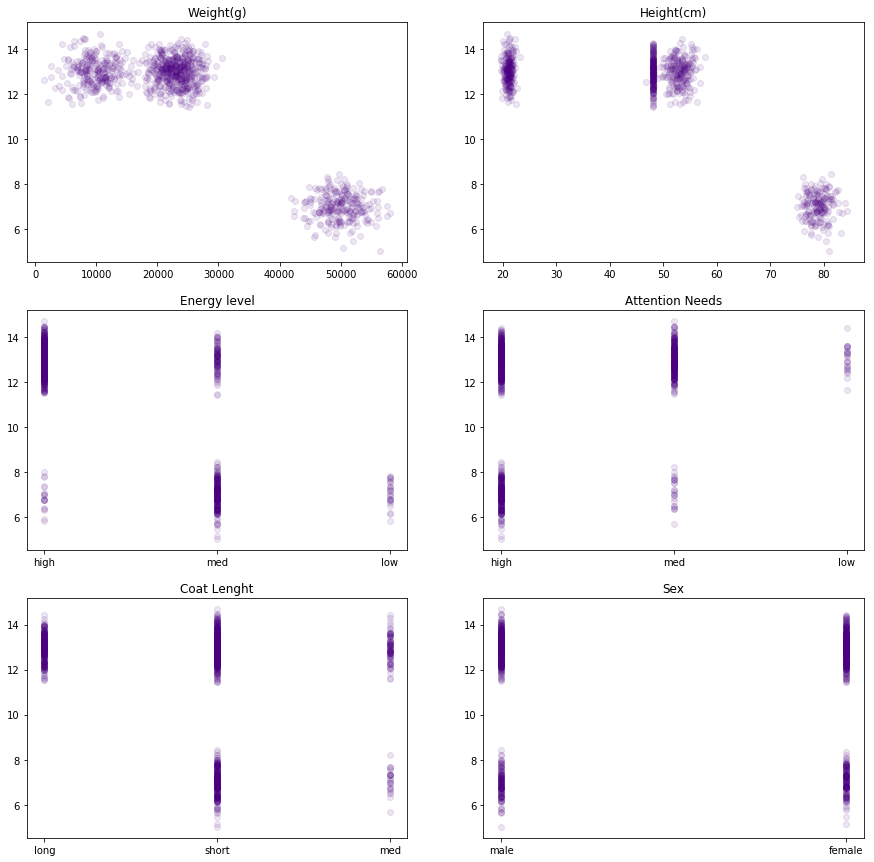

In [39]:
data = pd.read_csv(FILE_NAME)

fig = plt.figure(figsize=(15, 15))
((p1,p2), (p3,p4), (p5,p6)) = fig.subplots(3,2, sharey=False)
# 
# Save longevity in a variable
longevity = data.iloc[:, 3]
# remove longevity column from data
data = data.drop("Longevity(yrs)", axis=1)

for i in range(1, 7):
        locals()['p'+str(i)].scatter(data.iloc[:,i],longevity,alpha = 0.1, color="indigo")
        locals()['p'+str(i)].set_title(data.columns[i])


### Observations:
- Longevity does not depend on sex
- Longevity depends on energy level, attention needs, weight and height, coat length

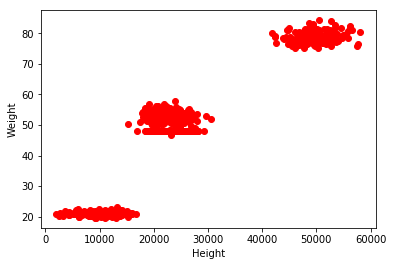

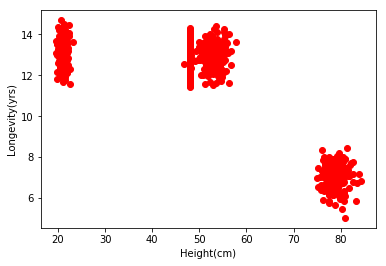

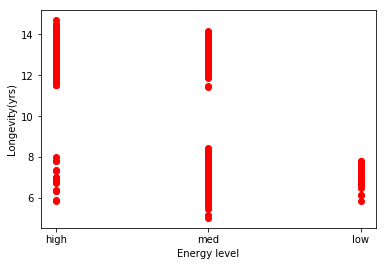

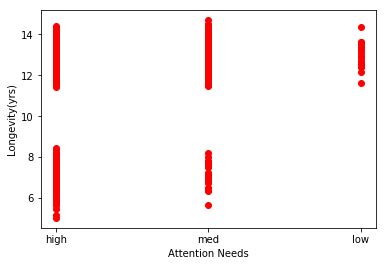

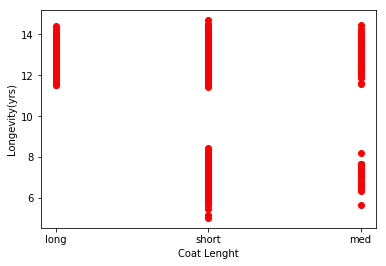

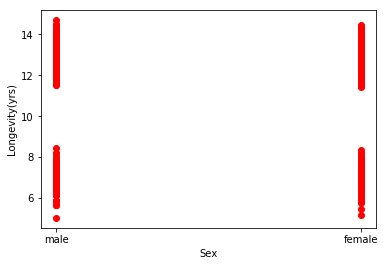

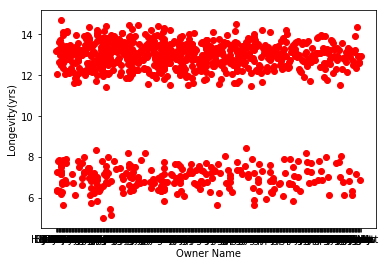

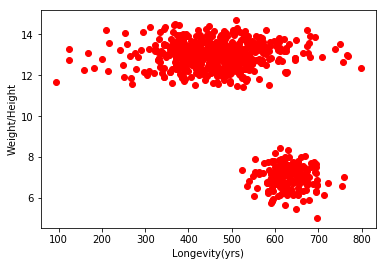

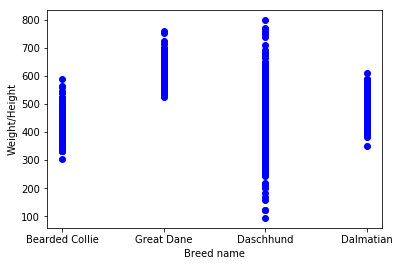

In [30]:
COLUMN_NAMES = ["Breed Name","Weight(g)","Height(cm)","Longevity(yrs)",
    "Energy level", "Attention Needs", "Coat Lenght", "Sex",
    "Owner Name"]
feature_names = ["Weight(g)","Height(cm)",
    "Energy level", "Attention Needs", "Coat Lenght", "Sex",
    "Owner Name"]

plt.plot(data["Weight(g)"], data["Height(cm)"], 'ro')
plt.ylabel("Weight")
plt.xlabel("Height")
plt.show()



for i in range(1, 7):
    
    plt.plot(data[feature_names[i]], longevity, 'ro')
    plt.ylabel("Longevity(yrs)")
    plt.xlabel(feature_names[i])
    plt.show()


data["WH"] = data["Weight(g)"]/data["Height(cm)"]

plt.plot(data["WH"], longevity, 'ro')
# plt.axis([0, 6, 0, 20])
plt.ylabel("Weight/Height")
plt.xlabel("Longevity(yrs)")
plt.show()


data["WH"] = data["Weight(g)"]/data["Height(cm)"]

plt.plot(data["Breed Name"], data["WH"], 'bo')
# plt.axis([0, 6, 0, 20])
plt.ylabel("Weight/Height")
plt.xlabel("Breed name")
plt.show()

# ngevity = data.iloc[:, 3]
# # remove longevity column from data
# data = data.drop("Longevity(yrs)", axis=1)

# for i in range(1, 7):
#         locals()['p'+str(i)].scatter(data.iloc[:,i],longevity, alpha = 0.1)
#         locals()['p'+str(i)].set_title(data.columns[i])